ЭТО НАЧАЛО РАБОТЫ НАД ЧЕТВЁРТЫМ ИНТЕНСИВОМ 

ПЕРВИЧНАЯ ЗАДАЧА
ПРОАНАЛИЗИРОВАТЬ КОММЕНТАРИИ НА ПРЕДМЕТ ОЧИЩАЕМЫХ ДАННЫХ И РАЗМЕТИТЬ ДАННЫЕ 

In [2]:
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install matplotlib.pyplot
%pip install statsmodels
%pip install pymorphy3
%pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable



ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for matplotlib.pyplot


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


СМОТР ДАННЫХ


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(20,10)})

In [4]:
train = pd.read_csv('разметка комментариев 2.csv')
train

,id,rating,comment,Нравится скорость отработки заявок,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Понравилось выполнение заявки,Вопрос решен
0,2945792,5,спасибо,NaN,NaN,NaN,NaN,NaN
1,3234340,5,спасибо!,NaN,NaN,NaN,NaN,NaN
2,3380332,5,Отлично,NaN,NaN,NaN,NaN,NaN
3,3381812,5,Благодарю за оперативное решение проблемы !,NaN,NaN,NaN,NaN,NaN
4,3461991,5,Прекрасный специалист! Побольше таких,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2368,3507812,5,"долго, но приятно",NaN,NaN,NaN,NaN,NaN
2369,3478532,5,16.03.2024 г ребята установили кондиционер. ра...,NaN,NaN,NaN,NaN,NaN
2370,3296403,5,два дня мусоропровод. сегодня с утра тоже,NaN,NaN,NaN,NaN,NaN
2371,3165822,5,отрегулировать дверь замки . для должного откр...,NaN,NaN,NaN,NaN,NaN


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373 entries, 0 to 2372
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    2373 non-null   int64  
 1   rating                                2373 non-null   int64  
 2   comment                               2373 non-null   object 
 3   Нравится скорость отработки заявок    0 non-null      float64
 4   Нравится качество выполнения заявки   0 non-null      float64
 5   Нравится качество работы сотрудников  0 non-null      float64
 6   Понравилось выполнение заявки         0 non-null      float64
 7   Вопрос решен                          0 non-null      float64
dtypes: float64(5), int64(2), object(1)
memory usage: 148.4+ KB


In [9]:
import pandas as pd
import re

def clean_text(text):
    """Очищает текст: оставляет только кириллические символы, приводит к нижнему регистру и удаляет лишние пробелы."""
    if not isinstance(text, str):
        return ""
    
    # Удаляем все символы, кроме кириллических и пробелов
    cleaned_text = re.sub(r'[^а-яА-ЯёЁ\s]', ' ', text)
    # Заменяем множественные пробелы на одинарные
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    # Приводим к нижнему регистру и обрезаем пробелы по краям
    return cleaned_text.lower().strip()

# Загрузка данных
data = pd.read_csv('разметка комментариев 2.csv')

# Очистка текста в колонке 'comment'
data['comment'] = data['comment'].apply(clean_text)

# Удаление дубликатов и пустых значений
data = (
    data
    .drop_duplicates('comment')
    .dropna(subset=['comment'])
    .loc[data['comment'] != '']
)

# Вывод результата и сохранение
print(data)
data.to_csv('cleaned_data_proto.csv', index=False)

           id  rating                                            comment  \
0     2945792       5                                            спасибо   
2     3380332       5                                            отлично   
3     3381812       5          благодарю за оперативное решение проблемы   
4     3461991       5               прекрасный специалист побольше таких   
6     3572768       1                                пересчет и скорость   
...       ...     ...                                                ...   
2368  3507812       5                                   долго но приятно   
2369  3478532       5  г ребята установили кондиционер работа сделана...   
2370  3296403       5           два дня мусоропровод сегодня с утра тоже   
2371  3165822       5  отрегулировать дверь замки для должного открыв...   
2372  2991660       5                                 всё сделано хорошо   

      Нравится скорость отработки заявок  Нравится качество выполнения заявки  \
0     


          Аналитический отчет по отзывам          

ОСНОВНЫЕ ПОКАЗАТЕЛИ:
Всего отзывов: 2373
Средняя оценка: 4.95
Положительных отзывов (4-5): 2347 (98.9%)
Отрицательных отзывов (1-2): 21 (0.9%)

РАСПРЕДЕЛЕНИЕ ОЦЕНОК:
1 звезд: 18 (0.8%)
2 звезд: 3 (0.1%)
3 звезд: 5 (0.2%)
4 звезд: 16 (0.7%)
5 звезд: 2331 (98.2%)

АНАЛИЗ ПО КАТЕГОРИЯМ:
speed: 812 (34.22%)
quality: 1734 (73.07%)
staff: 249 (10.49%)
execution: 1677 (70.67%)
solved: 274 (11.55%)
no_category: 366 (15.42%)

АНАЛИЗ ТЕКСТА:
Слово 'спасибо' встречается в 1354 отзывах (57.06%)

20 самых частых слов:
быстро: 369
оперативно: 265
оперативность: 138
отлично: 112
благодарю: 112
мастер: 95
качественно: 93
огромное: 81
вопрос: 74
работу: 66
супер: 57
решили: 53
сделали: 52
проблему: 48
хорошо: 43
работает: 42
решение: 41
устранили: 41
заявки: 39
выполнена: 38


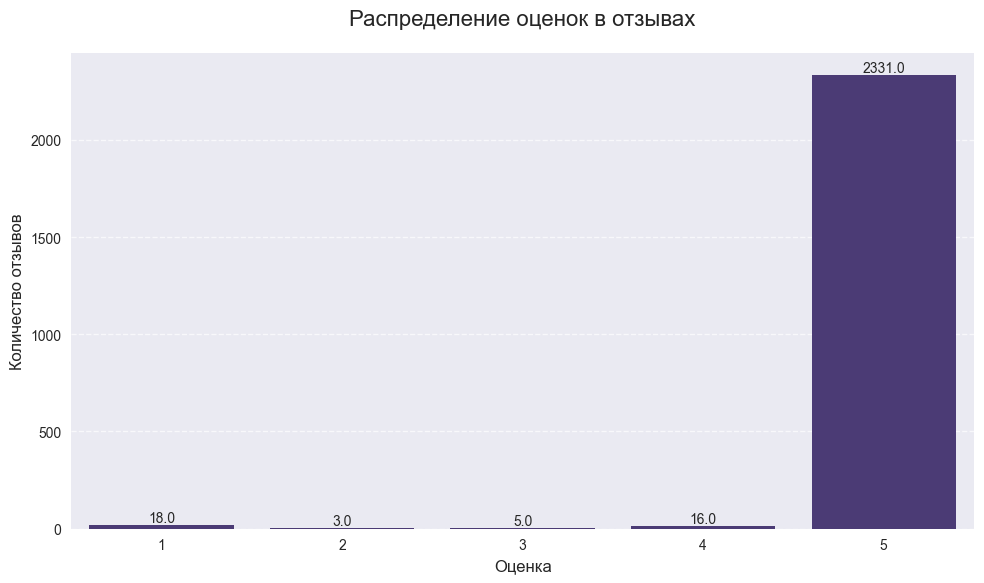

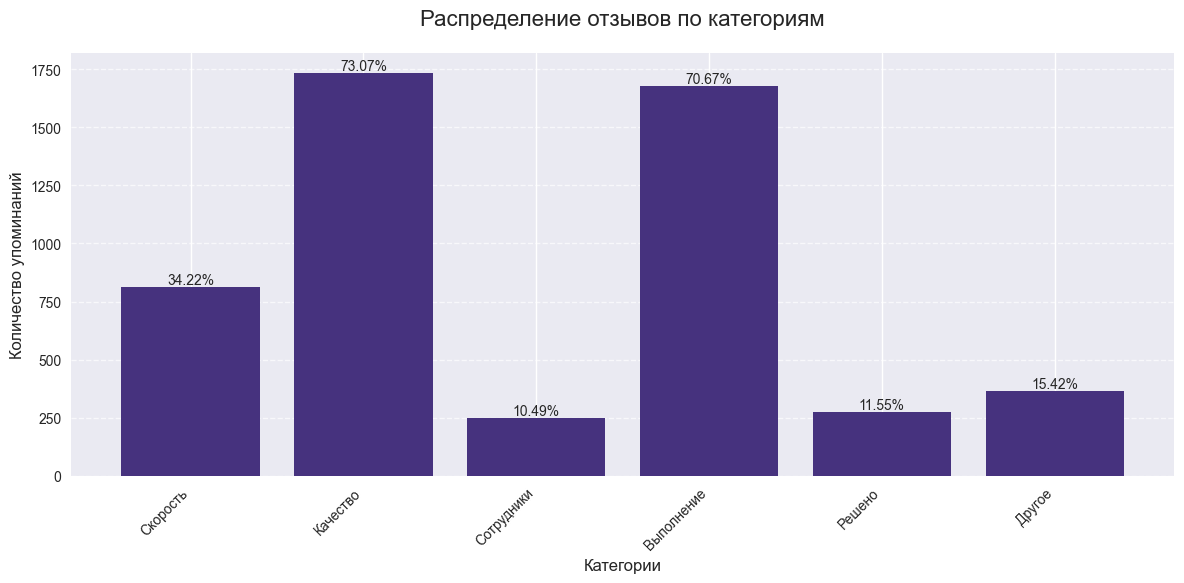

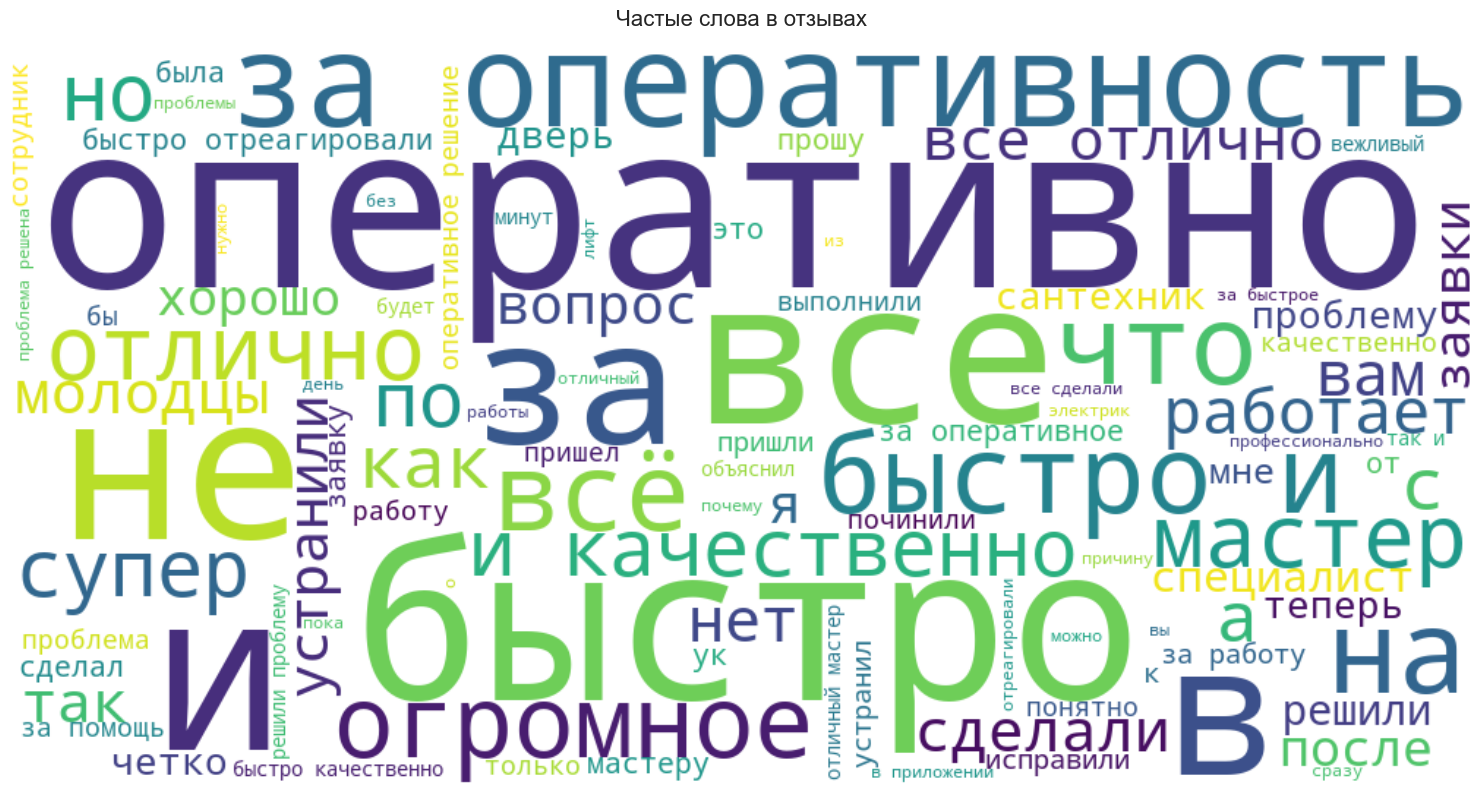

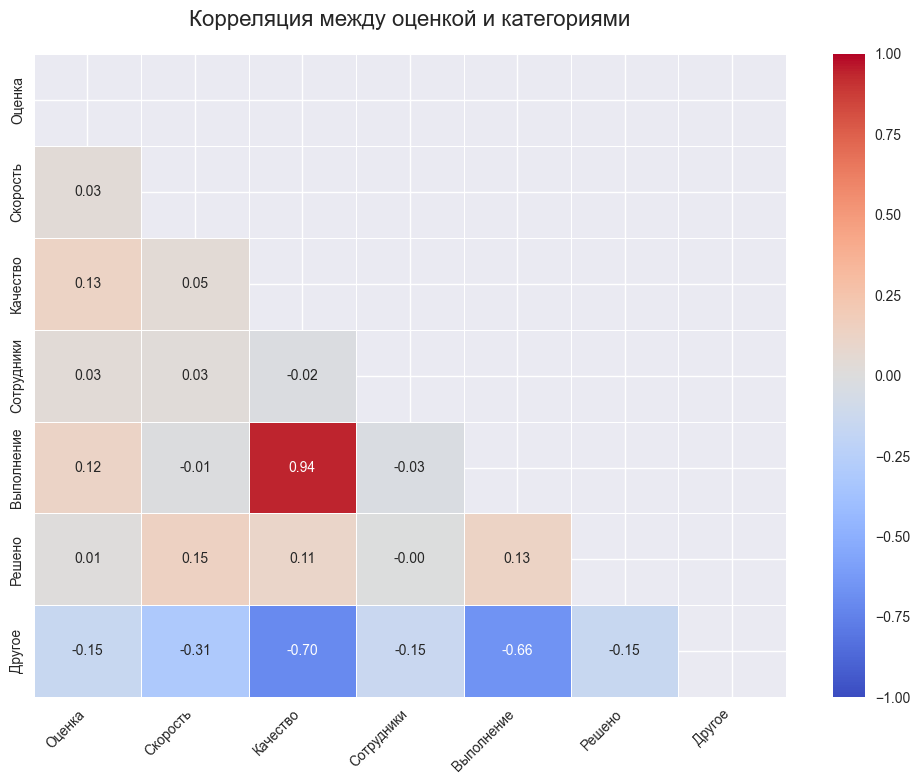

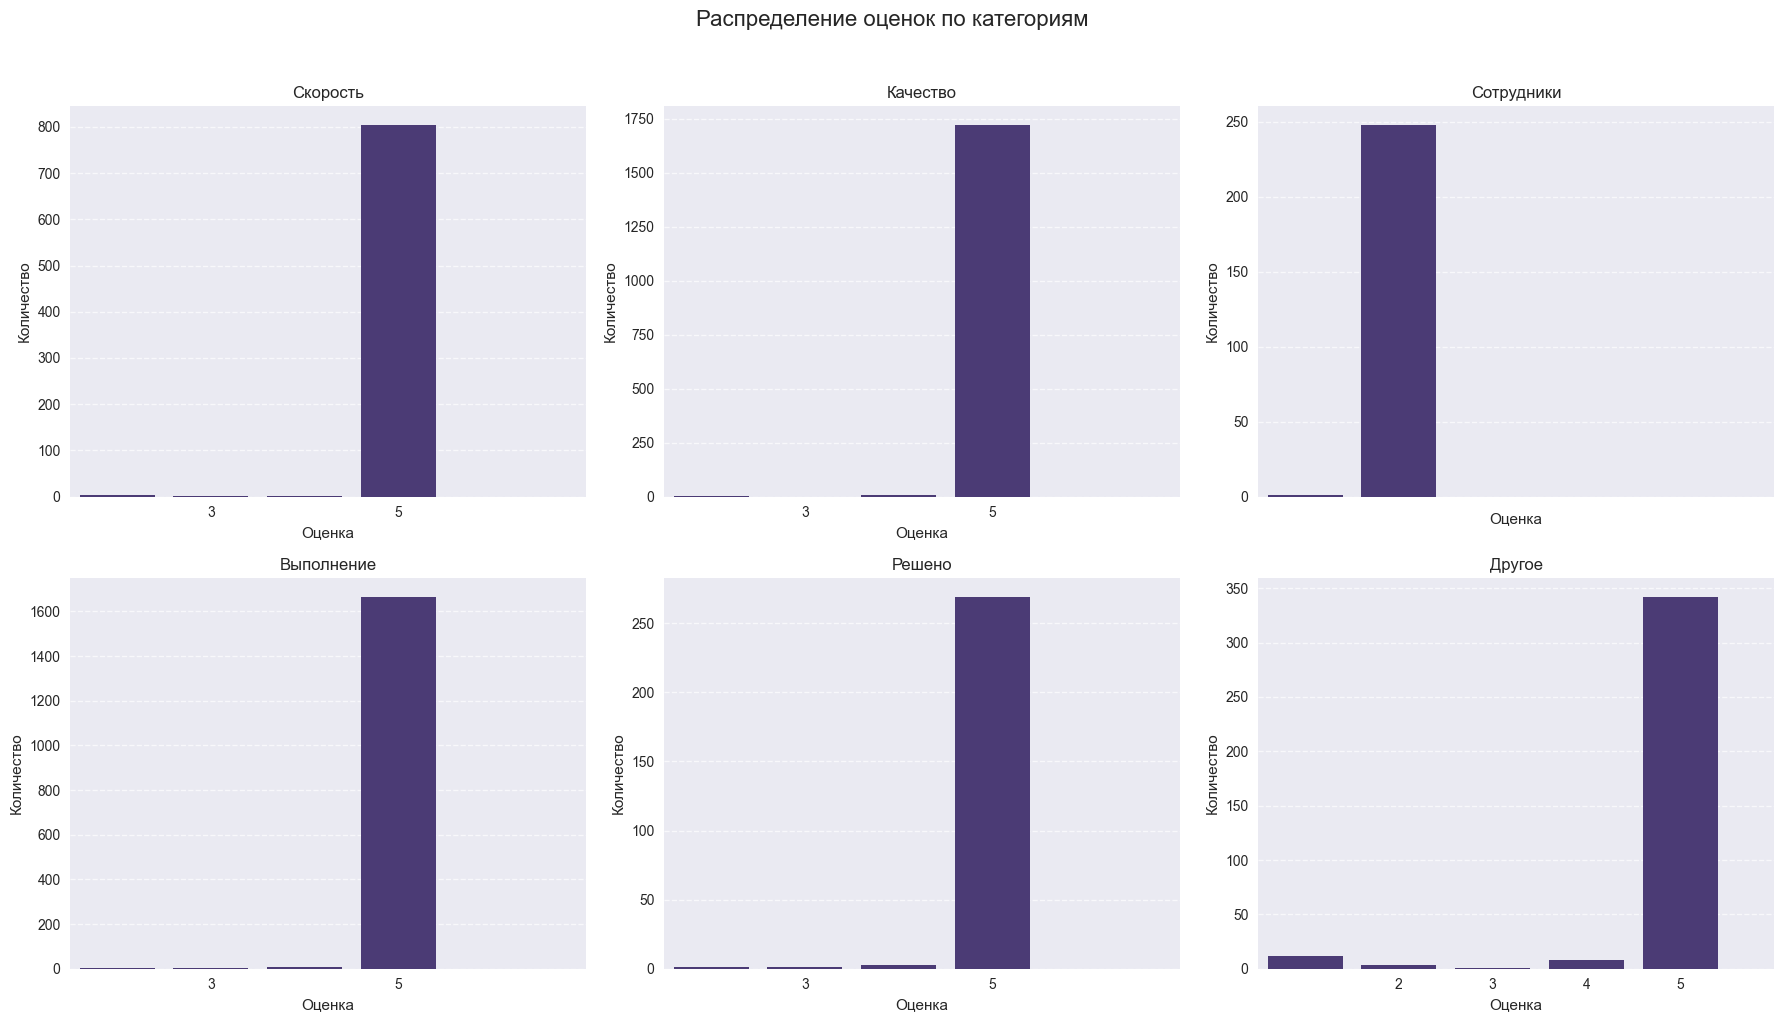

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud
import numpy as np

# Настройка стиля графиков
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
sns.set_palette("viridis")

def preprocess_data(df):
    """Предварительная обработка данных"""
    df['comment'] = df['comment'].str.lower().str.strip().fillna('')
    
    category_mapping = {
        'Нравится скорость отработки заявок': 'speed',
        'Нравится качество выполнения заявки': 'quality',
        'Нравится качество работы сотрудников': 'staff',
        'Понравилось выполнение заявки': 'execution',
        'Вопрос решен': 'solved',
        'Без категории': 'no_category'
    }
    
    df = df.rename(columns=category_mapping)
    return df, list(category_mapping.values())

def calculate_basic_stats(df):
    """Расчет базовой статистики"""
    stats = {
        'total_feedbacks': len(df),
        'average_rating': round(df['rating'].mean(), 2),
        'rating_distribution': df['rating'].value_counts().sort_index().to_dict(),
        'positive_feedbacks': len(df[df['rating'] >= 4]),
        'negative_feedbacks': len(df[df['rating'] <= 2])
    }
    return stats

def analyze_categories(df, categories):
    """Анализ по категориям"""
    category_stats = {}
    for category in categories:
        category_stats[category] = {
            'count': df[category].sum(),
            'percentage': round(df[category].sum() / len(df) * 100, 2)
        }
    return category_stats

def text_analysis(df):
    """Анализ текста комментариев"""
    all_comments = ' '.join(df['comment'].astype(str))
    stop_words = {'спасибо', 'большое', 'очень', 'это', 'что', 'как', 'для', 'все', 'еще'}
    words = [word for word in re.findall(r'\b[а-яё]{4,}\b', all_comments) if word not in stop_words]
    word_counts = Counter(words)
    thank_count = sum(1 for comment in df['comment'] if 'спасибо' in comment)
    
    return {
        'top_words': word_counts.most_common(20),
        'thank_count': thank_count,
        'thank_percentage': round(thank_count / len(df) * 100, 2)
    }

def plot_rating_distribution(df):
    """Визуализация распределения оценок"""
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.countplot(x='rating', data=df, ax=ax, order=sorted(df['rating'].unique()))
    
    plt.title('Распределение оценок в отзывах', fontsize=16, pad=20)
    plt.xlabel('Оценка', fontsize=12)
    plt.ylabel('Количество отзывов', fontsize=12)
    
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 5), 
                   textcoords='offset points',
                   fontsize=10)
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

def plot_category_distribution(category_stats):
    """Визуализация распределения по категориям"""
    categories = list(category_stats.keys())
    counts = [stats['count'] for stats in category_stats.values()]
    
    russian_names = {
        'speed': 'Скорость',
        'quality': 'Качество',
        'staff': 'Сотрудники',
        'execution': 'Выполнение',
        'solved': 'Решено',
        'no_category': 'Другое'
    }
    
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar([russian_names.get(cat, cat) for cat in categories], counts)
    
    plt.title('Распределение отзывов по категориям', fontsize=16, pad=20)
    plt.xlabel('Категории', fontsize=12)
    plt.ylabel('Количество упоминаний', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    
    for bar, (cat, stats) in zip(bars, category_stats.items()):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{stats["percentage"]}%',
                ha='center', va='bottom',
                fontsize=10)
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

def plot_word_cloud(df):
    """Визуализация облака слов"""
    all_comments = ' '.join(df['comment'].astype(str))
    stopwords = {'спасибо', 'очень', 'большое', 'благодарю', 'свой', 'этот', 'который'}
    
    wordcloud = WordCloud(width=1000, height=500,
                         background_color='white',
                         stopwords=stopwords,
                         colormap='viridis',
                         max_words=100,
                         min_font_size=10).generate(all_comments)
    
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title('Частые слова в отзывах', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

def plot_correlation_heatmap(df, categories):
    """Визуализация корреляционной матрицы"""
    russian_names = {
        'rating': 'Оценка',
        'speed': 'Скорость',
        'quality': 'Качество',
        'staff': 'Сотрудники',
        'execution': 'Выполнение',
        'solved': 'Решено',
        'no_category': 'Другое'
    }
    
    fig, ax = plt.subplots(figsize=(10, 8))
    corr_df = df[['rating'] + categories].rename(columns=russian_names)
    corr_matrix = corr_df.corr()
    
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f',
               cmap='coolwarm', vmin=-1, vmax=1,
               center=0, linewidths=.5,
               annot_kws={'size': 10}, ax=ax)
    
    plt.title('Корреляция между оценкой и категориями', fontsize=16, pad=20)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

def plot_rating_trend_by_category(df, categories):
    """Тренды оценок по категориям"""
    russian_names = {
        'speed': 'Скорость',
        'quality': 'Качество',
        'staff': 'Сотрудники',
        'execution': 'Выполнение',
        'solved': 'Решено',
        'no_category': 'Другое'
    }
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()
    
    for i, category in enumerate(categories[:6]):
        category_df = df[df[category] == 1]
        rating_dist = category_df['rating'].value_counts().sort_index()
        
        sns.barplot(x=rating_dist.index, y=rating_dist.values, ax=axes[i])
        axes[i].set_title(russian_names.get(category, category), fontsize=12)
        axes[i].set_xlabel('Оценка')
        axes[i].set_ylabel('Количество')
        axes[i].set_xticks(sorted(rating_dist.index))
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.suptitle('Распределение оценок по категориям', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

def print_text_report(stats, category_stats, text_stats):
    """Вывод текстового отчета"""
    print("\n" + "="*50)
    print("Аналитический отчет по отзывам".center(50))
    print("="*50)
    
    print("\nОСНОВНЫЕ ПОКАЗАТЕЛИ:")
    print(f"Всего отзывов: {stats['total_feedbacks']}")
    print(f"Средняя оценка: {stats['average_rating']:.2f}")
    print(f"Положительных отзывов (4-5): {stats['positive_feedbacks']} ({stats['positive_feedbacks']/stats['total_feedbacks']*100:.1f}%)")
    print(f"Отрицательных отзывов (1-2): {stats['negative_feedbacks']} ({stats['negative_feedbacks']/stats['total_feedbacks']*100:.1f}%)")
    
    print("\nРАСПРЕДЕЛЕНИЕ ОЦЕНОК:")
    for rating, count in sorted(stats['rating_distribution'].items()):
        print(f"{rating} звезд: {count} ({count/stats['total_feedbacks']*100:.1f}%)")
    
    print("\nАНАЛИЗ ПО КАТЕГОРИЯМ:")
    for category, values in category_stats.items():
        print(f"{category}: {values['count']} ({values['percentage']}%)")
    
    print("\nАНАЛИЗ ТЕКСТА:")
    print(f"Слово 'спасибо' встречается в {text_stats['thank_count']} отзывах ({text_stats['thank_percentage']}%)")
    print("\n20 самых частых слов:")
    for word, count in text_stats['top_words']:
        print(f"{word}: {count}")

def analyze_feedback_data(file_path):
    """Основная функция анализа данных"""
    # Отключение предупреждений
    import warnings
    warnings.filterwarnings('ignore')
    
    # Загрузка и предобработка данных
    df = pd.read_csv(file_path)
    df, categories = preprocess_data(df)
    
    # Расчет статистик
    stats = calculate_basic_stats(df)
    category_stats = analyze_categories(df, categories)
    text_stats = text_analysis(df)
    
    # Вывод текстового отчета
    print_text_report(stats, category_stats, text_stats)
    
    # Построение графиков
    plot_rating_distribution(df)
    plot_category_distribution(category_stats)
    plot_word_cloud(df)
    plot_correlation_heatmap(df, categories)
    plot_rating_trend_by_category(df, categories)

# Запуск анализа
analyze_feedback_data('Main_комментарии.csv')